In [47]:
import os
import sys
import pickle
import numpy as np
import re
import math

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
import pylab
pylab.rcParams["figure.figsize"] = 8, 6

In [5]:
os.listdir("DATA")

['data_batch_1',
 'readme.html',
 'batches.meta',
 'data_batch_2',
 'data_batch_5',
 'test_batch',
 'data_batch_4',
 'data_batch_3']

In [125]:
train_files = [os.path.join("DATA", file) \
         for file in os.listdir("DATA") \
         if re.match(r"^data_batch.*?", file)]

In [126]:
test_files = [os.path.join("DATA", file) \
         for file in os.listdir("DATA") \
         if re.match(r"^test_batch.*?", file)]

In [26]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#### Reading META Data

In [70]:
meta = unpickle(
    os.path.join("DATA", "batches.meta")
)

In [169]:
labels = list()
for i, label in enumerate(meta[b"label_names"]):
    print("class", i, "-", label.decode('ascii'))
    labels.append(label.decode('ascii'))

class 0 - airplane
class 1 - automobile
class 2 - bird
class 3 - cat
class 4 - deer
class 5 - dog
class 6 - frog
class 7 - horse
class 8 - ship
class 9 - truck


In [82]:
print("Single image shape:", meta[b"num_vis"], "- 32 height x 32 width x 3 color channels")

Single image shape: 3072 - 32 height x 32 width x 3 color channels


#### Reading data

In [140]:
X_train, y_train = list(), list()

for file in train_files:
    batch = unpickle(file)
    X_train.extend(batch[b"data"])
    y_train.extend(batch[b"labels"])    
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = list(), list()

for file in test_files:
    batch = unpickle(file)
    X_test.extend(batch[b"data"])
    y_test.extend(batch[b"labels"])    
X_test, y_test = np.array(X_test), np.array(y_test)

In [143]:
X_train = X_train.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X_test = X_test.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

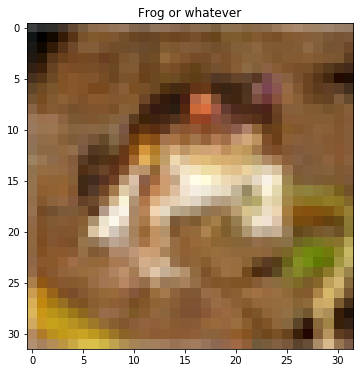

In [167]:
plt.imshow(X_train[0])
plt.title("Frog or whatever")
sys.stdout.flush()

In [165]:
print("\t What Batch consists of")
print("Batch title:", batch[b"batch_label"])
print("Labels:", batch[b"labels"][:5])
print("Data Shape:", batch[b"data"].shape)
print("Filenames:", batch[b"filenames"][0].decode('ascii'))

	 What Batch consists of
Batch title: b'testing batch 1 of 1'
Labels: [3, 8, 8, 0, 6]
Data Shape: (10000, 3072)
Filenames: domestic_cat_s_000907.png
